### 3d Charts

### Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{ 2x \ln(3) \cdot 3^{-x^2 - y^2}}{ \left(3^{-x^2 - y^2} +1 \right)^2}$$
## $$\frac{\partial f}{\partial y} = \frac{ 2y \ln(3) \cdot 3^{-x^2 - y^2}}{ \left(3^{-x^2 - y^2} +1 \right)^2}$$

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import sys

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #colores for the 3d chart depth
from sympy import symbols, diff
from math import log


%matplotlib inline

In [21]:
# Partial derivative function example 4
def fpx(x, y):
    r = 3**(-x**2 - y **2)
    return (2*x*log(3) * r) / ( r + 1 )**2
def fpy(x, y):
    r = 3**(-x**2 - y **2)
    return (2*y*log(3) * r) / ( r + 1 )**2


In [22]:
fpx(1.8, 1.0)

0.036808971619750504

### Graphing 3d Gradient Descent & Advanced numpy Arrays

In [40]:
# Setup
multiplyer = 0.3
max_i = 40
# initial guess
params = np.array([1.8, 1.0])
values_array = params.reshape(1,2)


for n in range (max_i):
# Sympy import is slow in the loop
#    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
#    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplyer * gradients
    #values_array = np.append(values_array, params.reshape(1,2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0 )

# Results print
print('Values in gradient array: ', gradients)
print('Min occures at x values of: ', params[0])
print('Min occures at y values of: ', params[1])
# print('Cost is: ', f(params[0], params[1]))

Values in gradient array:  [0.04794423 0.02663568]
Min occures at x values of:  0.07290077889347893
Min occures at y values of:  0.04050043271859942


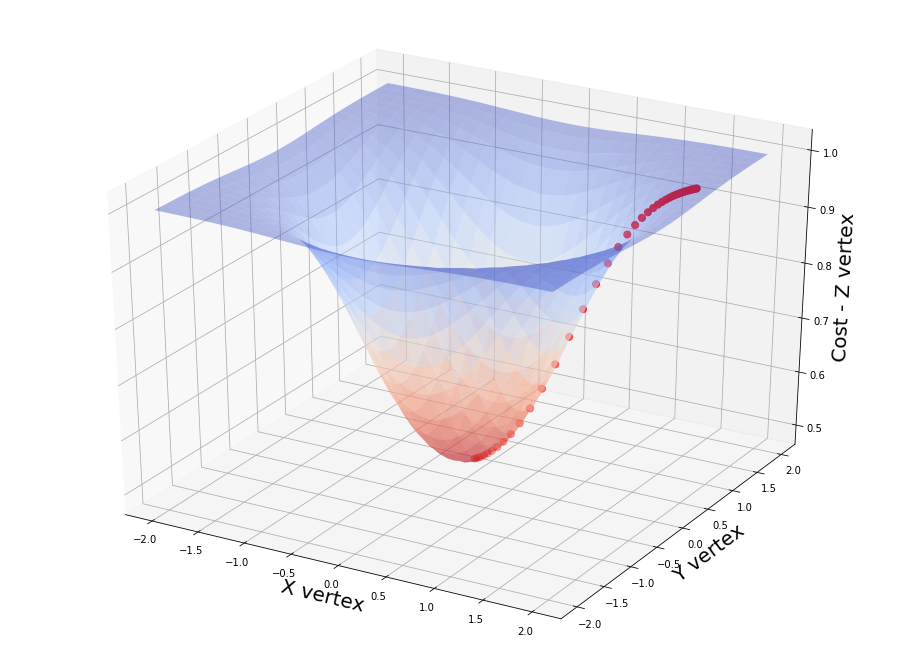

In [41]:
# Generate 3D plot with scatter
x_4 = np.linspace(start= -2, stop=2, num=55)
y_4 = np.linspace(start= -2, stop=2, num=55)
x_4, y_4 = np.meshgrid(x_4, y_4)


def f(x, y):
    r=3**(-x**2 - y**2)
    return 1/(r + 1)



# Plot graphs
fig = plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')

ax.set_xlabel("X vertex", fontsize=20)
ax.set_ylabel("Y vertex", fontsize=20)
ax.set_zlabel("Cost - Z vertex", fontsize=20)


ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm_r , alpha=0.4)
ax.scatter (values_array[:,0], values_array[:,1], f(values_array[:,0], values_array[:,1]), s=50, color='red')
plt.show()
#help(cm)